# 6장 텍스트와 시퀀스를 위한 딥러닝

[케라스 창시자에게 배우는 딥러닝] 책을 기반으로 제가 정리하고 요약한 내용입니다.  
제가 정말 관심있는 NLP쪽으로 드디어 왔습니다. 얼른 달려봅시다!

이 장에서는 텍스트(단어 또는 문자의 시퀀스), 시계열 또는 일반적인 시퀀스 데이터를 처리할 수 있는 딥러닝 모델을 살펴봅니다. 시퀀스 데이터를 처리하는 기본적인 딥러닝 모델은 **순환 신경망(recurrrent neural network)** 과 **1D 컨브넷(1D convnet)** 두 가지입니다.

이런 알고리즘을 사용하는 애플리케이션의 예입니다.
* 문서 분류나 시계열 분류. 예) 글의 주제나 책의 저자 식별하기
* 시계열 비교. 예) 두 문서나 두 주식 가격이 얼마나 밀접하게 관련이 있는지 추정하기
* 시퀀스-투-시퀀스 학습. 예) 영어 문장을 프랑스어로 변환하기
* 감성 분석. 예) 트윗이나 영화 리뷰가 긍정적인지 부정적인지 분류하기
* 시계열 예측. 예) 어떤 지역의 최근 날씨 데이터가 주어졌을 때 향후 날씨 예측하기

여기서는 2개의 문제를 다룹니다. IMDB 데이터셋의 감정 분석과 기온 예측입니다.

## 6.1 텍스트 데이터 다루기

텍스트는 가장 흔한 시퀀스 형태의 데이터입니다. 단어의 시퀀스나 문자의 시퀀스로 이해할 수 있는데 보통 단어 수준으로 작업하는 경우가 많습니다.


다른 모든 신경망과 마찬가지로 텍스트 원본을 입력으로 사용하지 못하므로 텍스트를 수치형 텐서로 변환해야 하는데 이 과정을 **텍스트 벡터화(vectorizing text)** 라고 합니다. 여기에는 여러 가지 방식이 있습니다.
* 텍스트를 단어로 나누고 각 단어를 하나의 벡터로 변환합니다.
* 텍스트를 문자로 나누고 각 문자를 하나의 벡터로 변환합니다.
* 텍스트에서 단어나 문자의 **n-그램(n-gram)** 을 추출하여 각 n-그램을 하나의 벡터로 변환합니다. n-그램은 연속된 단어나 문자의 그룹으로 텍스트에서 단어나 문자를 하나씩 이동하면서 추출합니다.

텍스트를 나누는 이런 단위(단어, 문자, n-그램)를 **토큰(token)** 이라고 합니다. 그리고 텍스트를 토큰으로 나누는 작업을 **토큰화(tokenization)** 라고 합니다. 

모든 텍스트 벡터화 과정은 어떤 종류의 토큰화를 적용하고 생성된 토큰에 수치형 벡터를 연결하는 것으로 이루어집니다. 여기서는 두 가지의 토큰과 벡터를 연결하는 방법을 소개합니다.
* **원-핫 인코딩(one-hot encoding)**
* **토큰 임베딩(token embedding)** 또는 **단어 임베딩(word embedding)**


### 6.1.1 단어와 문자의 원-핫 인코딩

원-핫 인코딩은 3장의 IMDB와 로이터 예제에서 사용했었습니다. 모든 단어에 고유한 정수 인덱스를 부여하고 이 정수 인덱스 i를 크기가 N(어휘 사전의 크기)인 이진 벡터로 변환합니다. 이 벡터는 i번째 원소만 1이고 나머지는 모두 0입니다.

케라스에는 원본 텍스트 데이터를 단어 또는 문자 수준의 원-핫 인코딩으로 변환해 주는 유틸리티가 있습니다. 또한 특수 문자를 제거하거나 빈도가 높은 N개의 단어만 선택하는 등의 기능도 있습니다.

In [0]:
# 코드 6-3 케라스를 사용한  단어 수준의 원-핫 인코딩하기
from keras.preprocessing.text import Tokenizer

samples = ['The cat sat on the mat.', 'The dog ate my homework.']

# 가장 빈도가 높은 1,000개의 단어만 선택하도록 Tokenizer 객체를 만듭니다.
tokenizer = Tokenizer(num_words=1000)
# 단어 인덱스를 구축합니다.
tokenizer.fit_on_texts(samples)

# 문자열을 정수 인덱스의 리스트로 변환합니다. ex) [[1, 2, 3, 4, 1, 5], [1, 6, 7, 8, 9]]
sequences = tokenizer.texts_to_sequences(samples)

# 직접 원-핫 이진 벡터 표현을 얻을 수 있습니다.
# 원-핫 인코딩 외에 다른 벡터화 방법들도 제공합니다.
# texts_to_matrix() 메서드는 텍스트->시퀀스 리스트 texts_to_sequences() 메서드와 시퀀스 리스트->넘파이 배열 sequences_to_matrix() 메서드를 차례대로 호출합니다.
# one_hot_results는 1,000개의 단어 중 해당 인덱스들만 1이고 나머진 0입니다. ex) [[0, 1, 1, 1, 1, 1, 0, 0, ... , 0], [0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, ..., 0]]
one_hot_results = tokenizer.texts_to_matrix(samples, mode='binary')

# 계산된 단어 인덱스를 구합니다. -  딕셔너리 형태의 단어 사전(key:단어, value:index)
word_index = tokenizer.word_index
print('%s개의 고유한 토큰을 찾았습니다.' % len(word_index))

Using TensorFlow backend.


9개의 고유한 토큰을 찾았습니다.


원-핫 인코딩의 변종 중 하나는 **원-핫 해싱(one-hot hashing)** 기법입니다. 이 방식은 어휘 사전에 있는 고유한 토큰의 수가 너무 커서 모두 다루기 어려울 때 사용합니다. 각 단어에 명시적으로 인덱스를 할당하고 이 인덱스를 딕셔너리에 저장하는 대신에 단어를 해싱하여 고정된 크기의 벡터로 변환합니다.


장점은 명시적인 단어 인덱스가 필요 없기 때문에 메모리를 절약하고 온라인 방식으로 데이터를 인코딩할 수 있습니다. 단점은 해시 충돌(hash collision)입니다.

In [0]:
# 코드 6-4 해싱 기법을 사용한 단어 수준의 원-핫 인코딩하기(간단한 예)
samples = ['The cat sat on the mat.', 'The dog ate my homework.']

# 단어를 크기가 1,000인 벡터로 저장합니다.
# 1,000개(또는 그 이상)의 단어가 있다면 해싱 충돌이 늘어나고 인코딩의 정확도가 감소될 것입니다.
dimensionality = 1000
max_length = 10

results = np.zeros((len(samples), max_length, dimensionality))
for i, sample in enumerate(samples):
  for j, word in list(enumerate(sample.split()))[:max_length]:
    # 단어를 해싱하여 0과 1,000 사이의 랜덤한 정수 인덱스로 변환합니다.
    index = abs(hash(word)) % dimensionality
    results[i, j, index] = 1.

### 6.1.2 단어 임베딩 사용하기

단어와 벡터를 연관 짓는 강력하고 인기 있는 또 다른 방법은 **단어 임베딩** 이라는 밀집 **단어 벡터(word vector)** 를 사용하는 것입니다.

원-핫 인코딩으로 만든 벡터는 희소(sparse)하고 고차원입니다.

반면에 단어 임베딩은 저차원의 실수형 벡터입니다.(밀집 벡터(dense))

| - | **원-핫 벡터** | **임베딩 벡터** |
| -------- | ------ | --------- |
|차원 | 	고차원(단어 집합의 크기) | 저차원 |
|다른 표현 | 희소 벡터의 일종 | 밀집 벡터의 일종 |
|표현 방법 | 수동 | 훈련 데이터로부터 학습함 |
|값의 타입 | 1 과 0 | 실수 |

단어 임베딩은 보통 256, 512차원 또는 큰 어휘 사전을 다룰 때는 1,024차원의 단어 임베딩을 사용합니다. 단어 임베딩을 만드는 방법은 두 가지입니다.

* (문서 분류나 감성 예측 같은)관심 대상인 문제와 함께 단어 임베딩을 학습합니다. 이런 경우에는 랜덤한 단어 벡터로 시작해서 신경망의 가중치를 학습하는 것과 같은 방식으로 단어 벡터를 학습합니다.

* 풀려는 문제가 아니고 다른 머신 러닝 작업에서 미리 계산된 단어 임베딩을 로드합니다. 이를 **사전 훈련된 단어 임베딩(pretrained word embedding)** 이라고 합니다.

**Embedding 층을 사용하여 단어 임베딩 학습하기**

단어와 밀집 벡터를 연관 짓는 가장 간단한 방법은 랜덤하게 벡터를 선택하는 것입니다. 이 방식의 문제점은 임베딩 공간이 구조적이지 않다는 것입니다. 비슷한 의미로 사용되는 단어들도 완전히 다른 임베딩을 가집니다. 그러므로 단어 사이에 있는 의미 관계를 반영해야 합니다.

단어 임베딩은 언어를 기하학적 공간에 매핑하는 것입니다. 일반적으로 두 단어 벡터 사이의 거리(L2 거리)는 이 단어 사이의 의미 거리와 관계되어 있습니다. 기러 외에 임베딩 공간의 특정 방향도 의미를 가질 수 있습니다.

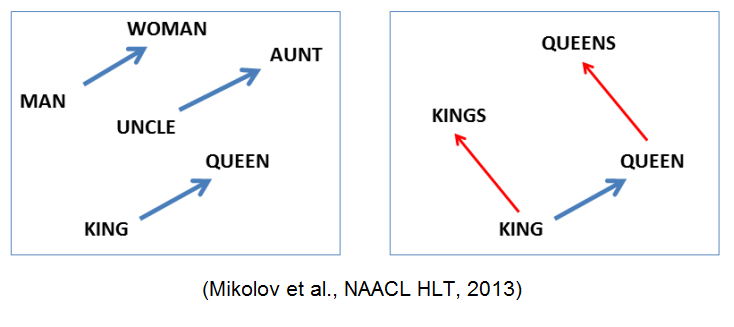

In [0]:
from IPython.display import Image
 
Image("wordembedding.png")

아쉽게도 사람의 언어를 완벽하게 매핑해서 어떤 자연어 처리 작업에도 사용할 수 있는 이상적인 단어 임베딩 공간은 아직 없습니다. 세상에는 많은 다른 언어가 있고 언어는 특정 문화와 환경을 반영하기 때문에 서로 동일하지 않습니다. 문제에 따라 크게 달라지기 때문에 새로운 작업에는 새로운 임베딩을 학습하는 것이 맞습니다.

다행히 역전파를 사용하여 쉽게 만들 수 있고 Embedding 층의 가중치를 학습하면 됩니다.

In [0]:
# 코드 6-5 Embedding 층의 객체 생성하기
from keras.layers import Embedding

# Embedding 층은 적어도 2개의 매개변수를 받습니다.
# 가능한 토큰의 개수(여기서는 1,000으로 단어 인덱스 최댓값 + 1입니다.)와 임베딩 차원(여기선 64)입니다.
# 인덱스 0은 사용하지 않으므로 단어 인덱스는 1 ~ 999 사이입니다.
embedding_layer = Embedding(1000, 64)

```Embedding``` 층을 (특정 단어를 나타내는) 정수 인덱스를 밀집 벡터로 매핑하는 딕셔너리로 이해하는 것이 가장 좋습니다. 정수를 입력으로 받아 내부 딕셔너리에서 이 정수에 연관된 벡터를 찾아 반환합니다. 딕셔너리 탐색은 효율적으로 수행됩니다.(텐서플로에서는 tf.nn.embedding_lookup()함수를 사용하여 병렬 처리됩니다.)

단어 인덱스 ---> Embedding 층 ---> 연관된 단어 벡터

```Embedding``` 층은 크기가 ```(samples, sequence_length)```인 2D 정수 텐서를 입력으로 받습니다. 각 샘플은 정수의 시퀀스입니다. 가변 길이의 시퀀스를 임베딩할 수 있습니다. 모든 시퀀스는 길이가 같아야 하므로 작은 길이의 시퀀스는 0으로 패딩되고 길이가 더 긴 시퀀스는 잘립니다.

```Embedding 층은 크기가 ```(samples, sequence_length, embedding_dimensionality)```인 3D 실수형 텐서를 반환합니다. 이런 3D 텐서는 RNN 층이나 1D 합성곱 층에서 처리됩니다.

Embedding 층의 객체를 생성할 때 가중치는 다른 층과 마찬가지로 랜덤하게 초기화됩니다. 훈련하면서 이 단어 벡터는 역전파를 통해 점차 조정되어 이어지는 모델이 사용할 수 있도록 임베딩 공간을 구성합니다. 훈련이 끝나면 임베딩 공간은 특정 문제에 특화된 구조를 많이 가지게 됩니다.

이제 이를 익숙한 IMDB 영화 리뷰 감성 예측 문제에 적용해 보겠습니다.

* 영화 리뷰에서 가장 빈도가 높은 1만 개의 단어 추출
* 리뷰에서 20개 단어 이후는 버림
* 이 네트워크는 1만 개의 단어에 대해 8차원의 임베딩을 학습하여 정수 시퀀스 입력을 임베딩 시퀀스로 바꿈(2D 정수 텐서 -> 3D 실수형 텐서)
* 그 다음 이 텐서를 2D로 펼쳐서 분류를 위한 Dense 층을 훈련

In [0]:
# 코드 6-6 Embedding 층에 사용할 IMDB 데이터 로드하기
from keras.datasets import imdb
from keras import preprocessing

# 특성으로 사용할 단어의 수
max_features = 10000
# 사용할 텍스트의 길이(가장 빈번한 max_features개의 단어만 사용합니다.)
maxlen = 20

# 정수 리스트로 데이터를 로드합니다.
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

# 리스트를 (samples, maxlen) 크기의 2D 정수 텐서로 변환합니다.
x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)

In [0]:
# 코드 6-7 IMDB 데이터에 Embedding 층과 분류기 사용하기
from keras.models import Sequential
from keras.layers import Flatten, Dense, Embedding

model = Sequential()
# 나중에 임베딩된 입력을 Flatten 층에서 펼치기 위해 Embedding 층에 input_length를 지정합니다.
# input_length를 지정하지 않으면 출력 텐서의 차원이 (None, None, 8)이 됩니다. 
# Flatten 층을 사용하려면 첫번째 배치 차원을 제외하고 나머지 차원이 결정되어야 하므로 input_length를 지정하여 (None, 20, 8)로 만듭니다.
# Embedding 층의 출력 크기는 (samples, maxlen, 8)이 됩니다.
model.add(Embedding(10000, 8, input_length=maxlen))

# 3D 임베딩 텐서를 (samples, maxlen * 8) 크기의 2D 텐서로 펼칩니다.
model.add(Flatten())

# 분류기를 추가합니다.
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
model.summary()

history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)

W0828 09:53:32.916114 139922658850688 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0828 09:53:32.922600 139922658850688 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0828 09:53:32.985579 139922658850688 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3376: The name tf.log is deprecated. Please use tf.math.log instead.

W0828 09:53:32.993312 139922658850688 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 20, 8)             80000     
_________________________________________________________________
flatten_2 (Flatten)          (None, 160)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 161       
Total params: 80,161
Trainable params: 80,161
Non-trainable params: 0
_________________________________________________________________


W0828 09:53:33.245703 139922658850688 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 7s 373us/step - loss: 0.6759 - acc: 0.6050 - val_loss: 0.6398 - val_acc: 0.6814
Epoch 2/10
20000/20000 [==============================] - 4s 177us/step - loss: 0.5657 - acc: 0.7427 - val_loss: 0.5467 - val_acc: 0.7206
Epoch 3/10
20000/20000 [==============================] - 3s 168us/step - loss: 0.4752 - acc: 0.7808 - val_loss: 0.5113 - val_acc: 0.7384
Epoch 4/10
20000/20000 [==============================] - 3s 173us/step - loss: 0.4263 - acc: 0.8077 - val_loss: 0.5008 - val_acc: 0.7452
Epoch 5/10
20000/20000 [==============================] - 3s 170us/step - loss: 0.3930 - acc: 0.8258 - val_loss: 0.4981 - val_acc: 0.7538
Epoch 6/10
20000/20000 [==============================] - 4s 176us/step - loss: 0.3668 - acc: 0.8395 - val_loss: 0.5014 - val_acc: 0.7530
Epoch 7/10
20000/20000 [==============================] - 3s 173us/step - loss: 0.3435 - acc: 0.8533 - val_loss: 0.5052 - v

약 75% 정도의 검증 정확도가 나옵니다. 하지만 임베딩 시퀀스를 펼치가 하나의 Dense 층을 훈련했으므로 입력 시퀀스에 있는 각 단어를 독립적으로 다루었고 단어 사이의 관계나 문장 구조를 고려하지 않았습니다.

각 시퀀스 전체를 고려한 특성을 학습하도록 임베딩 층 위에 순환 층이나 1D 합성곱 층을 추가하는 것이 좋습니다. 다음 절에서 다루겠습니다.

**사전 훈련된 단어 임베딩 사용하기**

자연어 처리에서 사전 훈련된 단어 임베딩을 사용하는 이유는 이미지 분류 문제에서 사전 훈련된 컨브넷을 사용하는 이유와 거의 동일합니다. 충분한 데이터가 없어서 자신만의 좋은 특성을 학습하지 못하지만 꽤 일반적인 특성이 필요합니다.

단어 임베딩은 일반적으로  단어 출현 통계를 사용하여 계산됩니다. 여기에는 여러 가지 기법이 사용되는데 신경망을 사용하는 것도 있고 그렇지 않은 방법도 있습니다.

케라스의 Embedding 층을 위해 내려받을 수 있는 미리 계산된 단어 임베딩 데이터베이스가 여럿 있습니다.

**Word2vec** 알고리즘은 가장 유명하고 성공적인 단어 임베딩 방법입니다. Word2vec의 차원은 성별처럼 구체적인 의미가 있는 속성을 잡아냅니다.  
**GloVe** 는 단어의 동시 출현 통계를 기록한 행렬을 분해하는 기법을 사용합니다. 이 개발자들은 위키피디아 데이터와 커먼 크롤 데이터에서 가져온 수백만 개의 영어 토큰에 대해서 임베딩을 미리 계산해 놓았습니다.

이제 GloVe 임베딩을 케라스 모델에 어떻게 사용하는지 알아봅니다.

### 6.1.3 모든 내용을 적용하기: 원본 텍스트에서 단어 임베딩까지

케라스에 포함된 IMDB 데이터는 이미 토큰화가 되어 있습니다. 이를 사용하는 대신 원본 텍스트 데이터를 내려받아 처음부터 시작하겠습니다.

**원본 IMDB 텍스트 내려받기**

먼저 [링크](https://mng.bz/0tIo) 에서 IMDB 원본 데이터셋을 내려받고 압축을 해제합니다. 직접 구글 드라이브에 올리니까 시간이 너무 오래걸려서 시간 문제로 직접 돌려보지는 못했고 코드를 이해하는 형식으로 진행했습니다.

훈련용 리뷰 하나를 문자열 하나로 만들어훈련 데이터를 문자열의 리스트로 구성합니다. 리뷰 레이블(긍정/부정)도 labels 리스트로 만들겠습니다.

In [0]:
# 코드 6-8 IMDB 원본 데이터 전처리하기

import os

imdb_dir = './datasets/aclImdb'
train_dir = os.path.join(imdb_dir, 'train')

labels = []
texts = []

for label_type in ['neg', 'pos']:
  dir_name = os.path.join(train_dir, label_type)
  for fname in os.listdir(dir_name):
    if fname[-4:] == '.txt':
      f = open(os.path.join(dir_name, fname), encoding='utf8')
      texts.append(f.read())
      f.close()
      if label_type == 'neg':
        labels.append(0)
      else:
        labels.append(1)

**데이터 토큰화**

텍스트를 벡터로 만들고 훈련 세트와 검증 세트로  나누겠습니다. 사전 훈련된 단어 임베딩은 훈련 데이터가 부족한 문제에 특히 유용합니다.(그렇지 않으면 문제에 특화된 임베딩이 훨씬 성능이 좋습니다.) 그래서 다음과 같이 훈련 데이터를 처음 200개의 샘플로 제한합니다. 이 모델은 200개의 샘플을 학습한 후 영화 리뷰를 분류할 것입니다.

In [0]:
# 코드 6-9 IMDB 원본 데이터의 텍스트를 토큰화하기
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np

maxlen = 100 # 100개 단어 이후는 버립니다.
training_samples = 200 # 훈련 샘플은 200개입니다.
validation_samples = 10000 # 검증 샘플은 1만 개입니다.
max_words = 10000 # 데이터셋에서 가장 빈도 높은 1만 개의 단어만 사용합니다.

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print('%s개의 고유한 토큰을 찾았습니다.' % len(word_index))

data = pad_sequences(sequences, maxlen=maxlen)

labels = np.asarray(labels)
print('데이터 텐서의 크기:', data.shape)
print('레이블 텐서의 크기:', labels.shape)

# 데이터를 훈련 세트와 검증 세트로 분할합니다.
# 샘플이 순서대로 있기 때문에(부정 샘플이 모두 나온 후 긍정 샘플이 옵니다)
# 먼저 데이터를 섞습니다.
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]

**GloVe 단어 임베딩 내려받기**

[링크](https://nlp.stanford.edu/projects/glove)에서 2014년 영문 위키피디아를 사용하여 사전에 계산된 임베딩을 내려받습니다. 파일의 이름은 glove.6B.zip이고 압축 파일의 크기는 823MB입니다. 40만개의 단어에 대한 100차원의 임베딩 벡터를 포함하고 있습니다. 이것 역시 시간 관계상 이해하고 넘어갑니다.

**임베딩 전처리**

압축 해제한 파일(.txt 파일)을 파싱하여 단어(즉 문자열)와 이에 상응하는 벡터 표현(즉 숫자 벡터)을 매핑하는 인덱스를 만듭니다.

In [0]:
# 코드 6-10 GloVe 단어 임베딩 파일 파싱하기
glove_dir = './datasets/'

embeddings_index = {}
f = open(os.path.join(glove_dir, 'glove.6B.100d.txt'), encoding='utf8')
for line in f:
  values = line.split()
  word = values[0]
  coefs = np.asarray(values[1:], dtype='float32')
  embeddings_index[word] = coefs
f.close()

print('%s개의 단어 벡터를 찾았습니다.' % len(embeddings_index))

그다음 Embedding 층에 주입할 수 있도록 임베딩 행렬을 만듭니다. 이 행렬의 크기는 ```(max_words, embedding_dim)```이어야 합니다. 이 행렬의 i번째 원소는 (토큰화로 만든) 단어 인덱스의 i번째 단어에 상응하는 ```embedding_dim```차원 벡터입니다. 인덱스 0은 어떤 단어나 토큰도 아닐 경우를 나타냅니다.

In [0]:
# 코드 6-11 GloVe 단어 임베딩 행렬 준비하기
embedding_dim = 100

embedding_marix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
  if i < max_words:
    embedding_vector = embedding_index.get(word)
    if embedding_vector is not None:
      # 임베딩 인덱스에 없는 단어는 모두 0이 됩니다.
      embedding_matrix[i] = embedding_vector

**모델 정의하기**

이전과 동일한 구조의 모델을 사용하겠습니다.

In [0]:
# 코드 6-12 모델 정의하기
from kears.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

**모델에 GloVe 임베딩 로드하기**

Embedding 층은 하나의 가중치 행렬을 가집니다. 이 행렬은 2D 부동 소수 행렬이고 각 i번째 원소는 i번째 인덱스에 상응하는 단어 벡터입니다. 모델의 첫 번째 층인 Embedding 층에 준비도니 GloVe 행렬을 로드합니다. 추가적으로 Embedding 층을 동결합니다. 사전 학습된 특성을 건드리지 않기 위해서입니다.

In [0]:
# 코드 6-13 사전 훈련된 단어 임베딩을 Embedding 층에 로드하기
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

**모델 훈련과 평가**

모델을 컴파일하고 훈련하고 그래프를 그려봅니다.


In [0]:
# 코드 6-14 훈련과 평가하기
# 코드 6-15 결과 그래프 그리기
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))
model.save_weights('pre_trained_glove_model.h5')

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

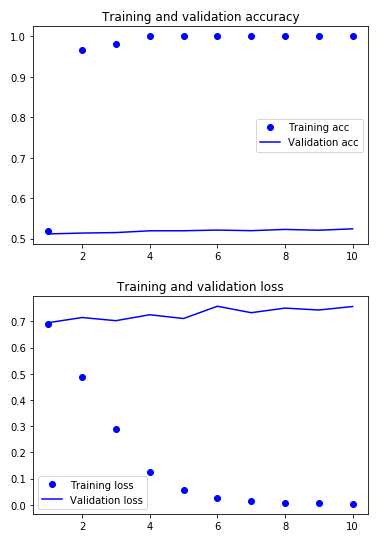

In [7]:
from IPython.display import Image
Image('pretrainedembedding.PNG')

이 모델은 과대적합이 빠르게 시작됩니다. 훈련 샘플 수가 적기 때문입니다. 같은 이유로  검증 정확도와 훈련 정확도 사이에 차이가 큽니다. 검증 정확도는 50% 후반을 달성한 것 같습니다.

이번엔 사전 훈련된 단어 임베딩을 사용하지 않거나 임베딩 층을 동결하지 않고 모델을 훈련할 수 있습니다. 일반적으로 데이터가 많다면 사전 훈련된 단어 임베딩보다 그냥 하는 것이 성능이 훨씬 높습니다. 200개라 거의 성능이 비슷할 것 같지만 진행해봅시다.

In [0]:
# 코드 6-16 사전 훈련된 단어 임베딩을 사용하지 않고 같은 모델 훈련하기
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))

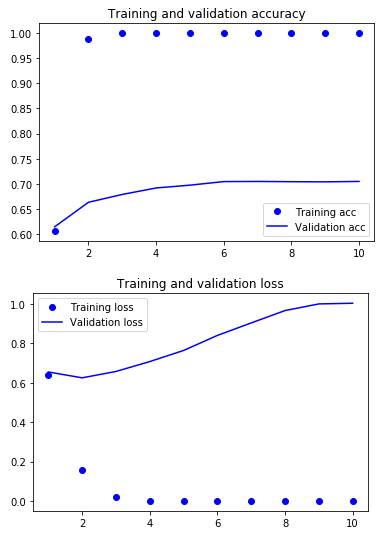

In [8]:
from IPython.display import Image
Image('notpretrainedembedding.PNG')

검증 정확도는 50% 초반에 멈추어 있습니다. 전과 비슷하지만 데이터가 적을 경우에는 사전 훈련된 단어 임베딩을 사용하는 것이 임베딩을 함께 훈련하는 것보다 낫습니다. 훈련 샘플 개수를 2,000개 정도 사용하면 사전 훈련된 단어 임베딩을 사용하지 않고도 70%에 가까운 검증 정확도를 얻을 수 있다고 합니다.

이제 테스트 데이터에서 모델을 평가합니다. 테스트 데이터를 토큰화하고 첫번째 모델을 로드하여 평가합니다.

In [0]:
# 코드 6-17 테스트 데이터 토큰화하기
# 코드 6-18 테스트 세트에서 모델 평가하기
test_dir = os.path.join(imdb_dir, 'test')

labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(test_dir, label_type)
    for fname in sorted(os.listdir(dir_name)):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname), encoding="utf8")
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

sequences = tokenizer.texts_to_sequences(texts)
x_test = pad_sequences(sequences, maxlen=maxlen)
y_test = np.asarray(labels)

model.load_weights('pre_trained_glove_model.h5')
model.evaluate(x_test, y_test)

테스트 정확도는 겨우 50% 정도입니다. 적은 수의 데이터이기 때문에 데이터를 늘리는 수밖에 답이 없는 것 같습니다!

### 6.1.4 정리

* 원본 텍스트를 신경망이 처리할 수 있는 형태로 변환합니다.
* 케라스 모델에 Embedding 층을 추가하여 어떤 작업에 특화된 토큰 임베딩을 학습합니다.
* 데이터가 부족한 자연어 처리 문제에서 사전 훈련된 단어 임베딩을 사용하여 성능 향상을 꾀합니다.

## 6.2 순환 신경망 이해하기

완전 연결 네트워크나 컨브넷처럼 지금까지 본 모든 신경망의 특징은 메모리가 없다는 것입니다. 네트워크로 주입되는 입력은 개별적으로 처리되며 입력 간에 유지되는 상태가 없습니다. 이런 네트워크로 시계열, 시퀀스 데이터를 처리하려면 전체 시퀀스를 주입해야합니다. 즉 전체 시퀀스를 하나의 데이터 포인트로 변환해야 합니다. 이런 네트워크를 **피드포워드 네트워크(feedforward network)** 라고 합니다.

이와 반대로 사람이 문장을 읽는 것처럼 이전에 나온 것을 기억하면서 단어별로 또는 한눈에 들어오는 만큼씩 처리할 수 있습니다. 이 모델은 과거 정보를 사용하며 구축되며 새롭게 얻은 정보를 계속 업데이트합니다. **순환 신경망(Recurrent Neural Network, RNN)** 은 같은 원리를 적용한 것입니다. 시퀀스의 원소를 순회하면서 지금까지 처리한 정보를 **상태(state)** 에 저장합니다. RNN은 내부에 루프를 가진 신경망의 한 종류입니다.

루프와 상태에 대한 개념을 명확히 하기 위해 넘파이로 간단한 RNN 정방향 계산을 구현해 봅니다.

이 RNN은 크기가```(timesteps, input_features)```인 2D 텐서로 인코딩된 벡터의 시퀀스를 입력 받습니다. 이 시퀀스는 타임스텝을 따라서 반복됩니다. 각 타임스텝 t에서 현재 상태와 (input_features) 크기의 입력을 연결하여 출력을 계산합니다. 그다음 이 출력을 다음 스텝의 상태로 설정합니다.

첫 번째 타임스텝에서는 이전 출력이 정의되지 않으므로 현재 상태가 없습니다. 그러므로 네트워크의 **초기 상태(initial state)** 인 0 벡터로 상태를 초기화합니다.

의사코드(pseudocode)로 표현해보겠습니다.

In [0]:
# 코드 6-19 의사코드로 표현한 RNN

# 타임스텝 t의 상태입니다.
state_t = 0
# 시퀀스의 원소를 반복합니다.
for input_t in input_sequence:
  output_t = f(input_t, state_t)
  # 출력은 다음 반복을 위한 상태가 됩니다.
  state_t = output_t

f 함수는 입력과 상태를 출력으로 반환합니다. 이를 2개의 행렬 W와 U 그리고 편향 벡터를 사용하는 코드로 바꿔봅니다.

In [0]:
# 코드 6-20 좀 더 자세한 의사코드로 표현한 RNN
state_t = 0
for input_t in input_sequence:
  output_t = activation(dot(W, input_t) + dot(U, state_t) + b)
  state_t = output_t

완벽하게 설명하기 위해 간단한 RNN의 정방향 계산을 넘파이로 구현합니다.

In [0]:
# 코드 6-21 넘파이로 구현한 간단한 RNN
import numpy as np

timesteps = 100 # 입력 시퀀스에 있는 타임스텝의 수
input_features = 32 # 입력 특성의 차원
output_features = 64 # 출력 특성의 차원

# 입력 데이터: 예제를 위해 생성한 난수
inputs = np.random.random((timesteps, input_features))

# 초기 상태: 모두 0인 벡터
state_t = np.zeros((output_features,))

# 랜덤한 가중치 행렬을 만듭니다.
W = np.random.random((output_features, input_features))
U = np.random.random((output_features, output_features))
b = np.random.random((output_features,))

successive_outputs = []
# input_t는 크기가 (input_features,)인 벡터입니다.
for input_t in inputs:
  # 입력과 현재 상태(이전 출력)를 연결하여 현재 출력을 얻습니다.
  output_t = np.tanh(np.dot(W, input_t) + np.dot(U, state_t) + b)
  
  # 이 출력을 리스트에 저장합니다.
  successive_outputs.append(output_t)
  
  # 다음 타임스텝을 위해 네트워크의 상태를 업데이트합니다.
  state_t = output_t
  
# 최종 출력은 크기가(timesteps, output_features)인 2D 텐서입니다.
final_output_sequence = np.stack(successive_outputs, axis=0)

요약하면 RNN은 반복할 때 이전에 계산한 정보를 재사용하는 for 루프에 지나지 않습니다.

### 6.2.1 케라스의 순환 층

넘파이로 구현한 과정이 실제 케라스의 ```SimpleRNN``` 층에 해당합니다.

In [0]:
from keras.layers import SimpleRNN

SimpleRNN이 한가지 다른 점은 넘파이 예제처럼 하나의 시퀀스가 아니라 다른 케라스 층과 마찬가지로 시퀀스 배치를 처리한다는 것입니다.  
즉 ```(timesteps, input_features)``` 크기가 아니라 ```(batch_size, timesteps, input_features) 크기의 입력을 받습니다.

케라스에 있는 모든 순환 층과 마찬가지로 SimpleRNN은 두 가지 모드로 실행할 수 있습니다.
* 각 타임스텝의 출력을 모은 전체 시퀀스를 반환(크기가 (```batch_size, timesteps, output_features```)인 3D 텐서)
* 입력 시퀀스에 대한 마지막 출력만 반환(크기가 (```batch_size, output_features```)인 2D 텐서) 

이 모드는 객체를 생성할 때 ```return_sequences``` 매개변수로 선택할 수 있습니다.

In [11]:
# 마지막 출력 시퀀스만 반환
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN

model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, 32)                2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [10]:
# 전체 상태 시퀀스를 반환
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, None, 32)          2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


네트워크의 표현력을 증가시키기 위해 여러 개의 순환 층을 차례대로 쌓는 것이 유용할 때가 있습니다. 이런 설정에서는 중간층들이 전체 출력 시퀀스를 반환하도록 설정해야 합니다.

In [12]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32)) # 맨 위 층만 마지막 출력을 반환합니다.
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_4 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_5 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_6 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_7 (SimpleRNN)     (None, 32)                2080      
Total params: 328,320
Trainable params: 328,320
Non-trainable params: 0
_________________________________________________________________


이제 IMDB 영화 리뷰 분류 문제에 적용해 봅시다. 먼저 데이터를 전처리합니다.

In [1]:
# 코드 6-22 IMDB 데이터 전처리하기
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000 # 특성으로 사용할 단어의 수
maxlen = 500 # 사용할 텍스트의 길이(가장 빈번한 max_features개의 단어만 사용합니다.)
batch_size = 32

print('데이터 로딩')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), '훈련 시퀀스')
print(len(input_test), '테스트 시퀀스')

print('시퀀스 패딩 (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train 크기:', input_train.shape)
print('input_test 크기:', input_test.shape)

Using TensorFlow backend.


데이터 로딩
25000 훈련 시퀀스
25000 테스트 시퀀스
시퀀스 패딩 (samples x time)
input_train 크기: (25000, 500)
input_test 크기: (25000, 500)


Embedding 층과 SimpleRNN 층을 사용하여 간단한 순환 네트워를 훈련시켜 봅니다.

In [2]:
# 코드 6-23 Embedding 층과 SimpleRNN 층을 사용한 모델 훈련하기
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Dense

model = Sequential()
model.add(Embedding(max_features, 32)) # (10000, 32)
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

W0829 06:32:53.586406 140113908782976 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0829 06:32:53.605717 140113908782976 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0829 06:32:53.608669 140113908782976 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0829 06:32:53.715435 140113908782976 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0829 06:32:53.738512 140113908782976 deprecation_wrappe

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 40s 2ms/step - loss: 0.6667 - acc: 0.5805 - val_loss: 0.5873 - val_acc: 0.7180
Epoch 2/10
20000/20000 [==============================] - 36s 2ms/step - loss: 0.4520 - acc: 0.7971 - val_loss: 0.4252 - val_acc: 0.8128
Epoch 3/10
20000/20000 [==============================] - 36s 2ms/step - loss: 0.3208 - acc: 0.8690 - val_loss: 0.4396 - val_acc: 0.7900
Epoch 4/10
20000/20000 [==============================] - 36s 2ms/step - loss: 0.2585 - acc: 0.8973 - val_loss: 0.3843 - val_acc: 0.8384
Epoch 5/10
20000/20000 [==============================] - 36s 2ms/step - loss: 0.2029 - acc: 0.9245 - val_loss: 0.4477 - val_acc: 0.8254
Epoch 6/10
20000/20000 [==============================] - 36s 2ms/step - loss: 0.1422 - acc: 0.9496 - val_loss: 0.3984 - val_acc: 0.8514
Epoch 7/10
20000/20000 [==============================] - 35s 2ms/step - loss: 0.0937 - acc: 0.9696 - val_loss: 0.5371 - val_acc:

이제 훈련과 검증의 손실 정확도를 그래프로 그립니다.

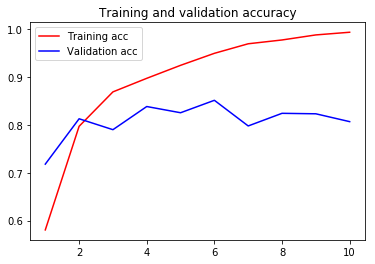

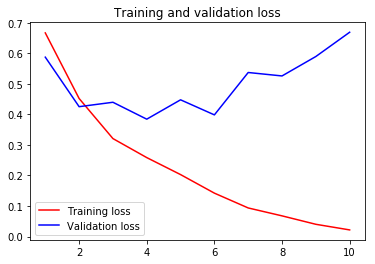

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

3장에서 이 데이터셋을 사용한 첫 번째 모델에서 얻은 테스트 정확도는 87%였지만 이 모델은 기존 모델보다 성능이 높지 않습니다. 이런 원인은 전체 시퀀스가 아니라 처음 500개의 단어만 입력에 사용했기 때문입니다.다른 이유는 SimpleRNN이 텍스트처럼 긴 시퀀스를 처리하는데 적합하지 않기 때문입니다. 더 잘 작동하는 다른 순황층을 보겠습니다.

### 6.2.2 LSTM과 GRU 층 이해하기

케라스에는 SimpleRNN 외에 다른 순환 층도 있습니다. LSTM과 GRU 2개입니다. 실전에서는 항상 둘 중 하나를 사용합니다. SimpleRNN은 실전에 쓰기에는 너무 단순하기 때문입니다.

SimpleRNN은 이론적으로 시간 t에서 이전의 모든 타임스텝의 정보를 유지할 수 있습니다. 실제로는 긴 시간에 걸친 의존성은 학습할 수 없는 것이 문제입니다. 층이 많은 일반 네트워크에서 나타나는 것과 비슷한 현상인 **그래디언트 소실 문제(vanishing gradient problem)** 때문입니다.

이런 문제를 해결하기 위해 고안된 것이 LSTM과 GRU 층입니다. 그 중 LSTM 층을 보겠습니다. LSTM(Long Short-Term Memory)은 SimpleRNN의 변종으로 정보를 여러 타임스텝에 걸쳐 나르는 방법이 추가됩니다.

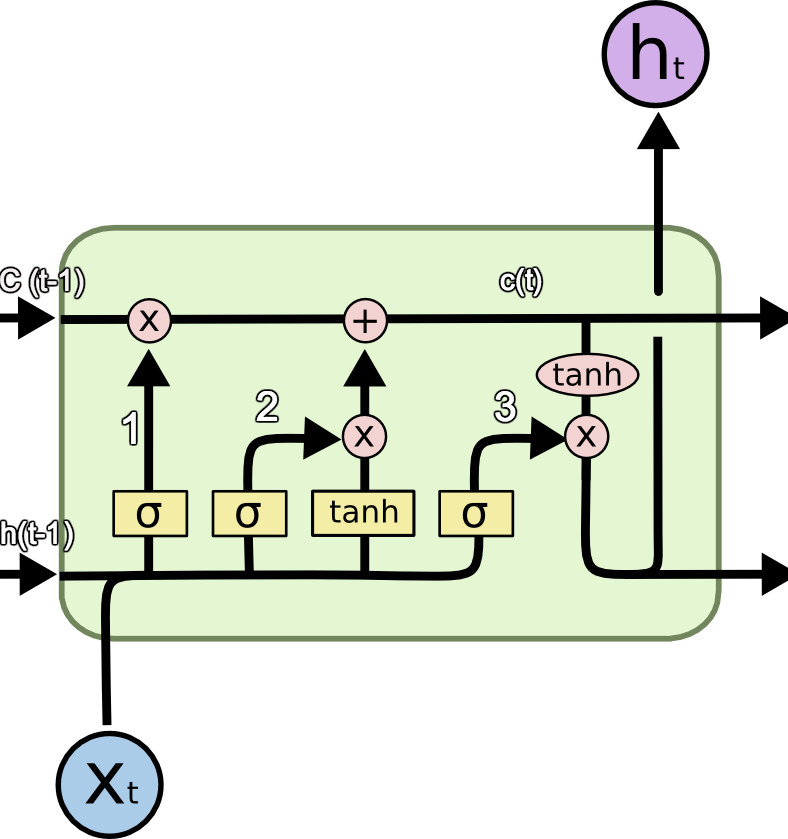

In [5]:
from IPython.display import Image
Image('lstm.png')

LSTM의 핵심은 c(t)라는 셀 스테이트입니다.LSTM은 cell state에 뭔가를 더하거나 없앨 수 있는 능력이 있는데, 이 능력은 gate라고 불리는 구조에 의해서 조심스럽게 제어됩니다. LSTM은 3개의 gate를 가지고 있고, 이 문들은 cell state를 보호하고 제어합니다.

**[1]** LSTM의 첫 단계로는 cell state로부터 어떤 정보를 버릴 것인지를 정하는 것으로, sigmoid layer에 의해 결정됩니다. 그래서 이 단계의 gate를 "forget gate layer"라고 부릅니다. 이 단계에서는 
ht-1과 xt 를 받아서 0과 1 사이의 값을 Ct−1에 보내줍니다. 그 값이 1이면 "모든 정보를 보존해라"가 되고, 0이면 "죄다 갖다버려라"가 됩니다.

**[2]** 들어오는 새로운 정보 중 어떤 것을 cell state에 저장할 것인지를 정합니다. 먼저, "input gate layer"라고 불리는 sigmoid layer가 어떤 값을 업데이트할 지 정하고 그 다음에 tanh layer가 새로운 후보 값들인 Ct라는 vector를 만들고, cell state에 더할 준비를 합니다. 이렇게 두 단계에서 나온 정보를 합쳐서 state를 업데이트할 재료를 만들게 됩니다.


**[3]** 마지막으로 무엇을 output으로 내보낼 지 정해야 합니다. 이 output은 cell state를 바탕으로 필터된 값이 될 것입니다. 가장 먼저, sigmoid layer에 input 데이터를 태워서 cell state의 어느 부분을 output으로 내보낼 지를 정하고 cell state를 tanh layer에 태워서 -1과 1 사이의 값을 받은 뒤에 방금 전에 계산한 sigmoid gate의 output과 곱해줍니다. 그렇게 하면 우리가 output으로 보내고자 하는 부분만 내보낼 수 있게 됩니다.

In [0]:
# 코드 6-25 LSTM 구조의 의사코드 (1/2)
output_t = asctivation(c_t) * activation(dot(input_t,Wo) + dot(state_tm Uo) + bo)

i_t = activation(dot(state_t, Ui) + dot(input_t, Wi) + bi)
f_t = activation(dot(state_t, Uf) + dot(input_t, Wf) + bf)
k_t = activation(dot(state_t, Uk) + dot(input_t, Wk) + bk)

i_t, f_t, k_t를 결합하여 새로운 이동상태(c_t+1)를 구합니다.

In [0]:
# 코드 6-26 LSTM 구조의 의사코드 (2/2)

c_t+1 = i_t * k_t + c_t * f_t

이 연산들이 하는 일을 해석하면 각 의미에 대해 통찰을 얻을 수 있습니다.
* c_t와 f_t의 곱셈은 이동을 위한 데이터 흐름에서 관련이 적은 정보를 의도적으로 삭제
* i_t와 k_t는 현재에 대한 정보를 제공하고 이동 트랙을 새로운 정보로 업데이트

하지만 연산들이 실제로 하는 일은 연산에 관련된 가중치 행렬에 따라 결정됩니다. 이 가중치는 엔드-투-엔드 방식으로 학습됩니다. 이 과정은 훈련 반복마다 새로 시작되며 이런저런 연산들에 목적을 부여하기가 불가능 합니다. LSTM 셀의 구체적인 구조에 대해 이해할 필요가 전혀 없다고 나와있지만 [링크](https://dgkim5360.tistory.com/entry/understanding-long-short-term-memory-lstm-kr)에 가면 많은 직관적 이해를 할 수 있습니다.

### 6.2.3 케라스를 사용한 LSTM 예제

In [6]:
# 코드 6-27 케라스에서 LSTM 층 사용하기

from keras.layers import LSTM

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 132s 7ms/step - loss: 0.5074 - acc: 0.7640 - val_loss: 0.3362 - val_acc: 0.8606
Epoch 2/10
20000/20000 [==============================] - 131s 7ms/step - loss: 0.2905 - acc: 0.8862 - val_loss: 0.3735 - val_acc: 0.8394
Epoch 3/10
20000/20000 [==============================] - 130s 6ms/step - loss: 0.2328 - acc: 0.9116 - val_loss: 0.3309 - val_acc: 0.8830
Epoch 4/10
20000/20000 [==============================] - 130s 7ms/step - loss: 0.1998 - acc: 0.9277 - val_loss: 0.4281 - val_acc: 0.8614
Epoch 5/10
20000/20000 [==============================] - 131s 7ms/step - loss: 0.1756 - acc: 0.9369 - val_loss: 0.2899 - val_acc: 0.8780
Epoch 6/10
20000/20000 [==============================] - 130s 7ms/step - loss: 0.1560 - acc: 0.9431 - val_loss: 0.4494 - val_acc: 0.8654
Epoch 7/10
20000/20000 [==============================] - 131s 7ms/step - loss: 0.1447 - acc: 0.9497 - val_loss: 0.5535 - v

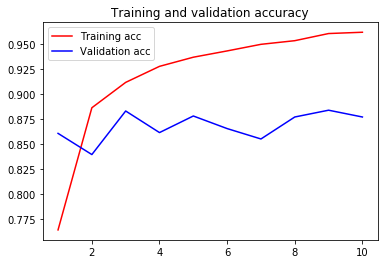

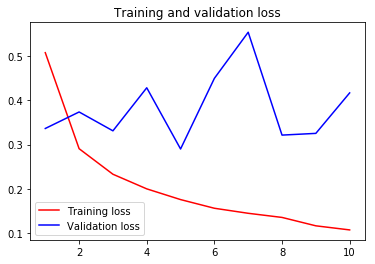

In [7]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

이번에는 88% 정도의 검증 정확도를 달성했습니다. vanishing gradient 문제로부터 덜 영향을 받기 때문에 SimpleRNN 네트워크보다 확실히 낫습니다.

하지만 많은 계산을 사용한 것치고는 좋은 결과는 아닙니다. 그 이유는 임베딩 차원이나 LSTM 출력 차원 같은 하이퍼파라미터를 전혀 튜닝하지 않았고 규제가 없었습니다.

또한 리뷰를 전체적으로 길게 분석하는 것(LSTM이 잘하는 일)은 감성 분류에 도움이 되지 않습니다. 그렇기에 간단한 문제는 단어 그리고 빈도수로 측정하는 게 더 좋습니다. (완전 연결 네트워크)

하지만 훨씬 복잡한 자연어 처리 문제에서는 유용합니다. 특히 질문-응답과 기계 번역 분야입니다.

### 6.2.4 정리

* RNN이 무엇이고 동작하는 방법
* LSTM이 무엇이고 긴 시퀀스에서 단순한 RNN보다 더 잘 작동하는 이유
* 케라스의 RNN 층을 사용하여 시퀀스 데이터를 처리하는 방법